In [1]:
import tensorflow as tf
sys.path.append('../')
sys.path.append('../..')
import data_processing.augmentations as aug
from data_processing.cifar10 import get_cifar10
import experiment_utils as eu
import sys
import importlib
import config as conf


In [2]:
import evaluation as eval 
importlib.reload(eval)

config = conf.get_byol()
config.batch_size = 10
ev = eval.Evaluation('saved_model', config)
ds, num_examples = get_cifar10(batch_size=config.batch_size, split='train', include_labels=True)
ds_test, _ = get_cifar10(batch_size=config.batch_size, split='test', include_labels=True)
ev.train(ds.take(10), ds_test.take(5), num_examples=100, batch_size=config.batch_size)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 000: Loss: 2.674, Train acc: 0.140, Val acc: 0.120


100%|██████████| 10/10 [00:05<00:00,  1.64it/s]

In [ ]:
from torchvision.transforms import transforms
augmentations = transforms.Compose(
                [
                    transforms.RandomResizedCrop(32),
                    transforms.RandomHorizontalFlip(p=0.5),
                    transforms.RandomApply([transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)], p=0.8),
                    transforms.RandomGrayscale(p=0.2),
                    transforms.ToTensor(),
                    transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])
                ])
augmentations_2 = transforms.Compose(
                [
                    transforms.RandomResizedCrop(32),
                    transforms.RandomHorizontalFlip(p=0.5),
                    transforms.RandomApply([transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)], p=0.8),
                    transforms.RandomGrayscale(p=0.2),
                    transforms.ToTensor(),
                    transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])
                ])
identity = transforms.Compose([
            transforms.ToTensor()
            # transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])
            ])

class MultiViewDataInjector(object):
    def __init__(self, *args):
        self.transforms = args[0]
        self.random_flip = transforms.RandomHorizontalFlip()

    def __call__(self, sample, *with_consistent_flipping):
        if with_consistent_flipping:
            sample = self.random_flip(sample)
        output = [transform(sample) for transform in self.transforms]
        return output

In [ ]:
import torchvision
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=MultiViewDataInjector([augmentations, identity]))

Files already downloaded and verified


torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])


torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])


torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])


<ipython-input-45-c6b9584f7384>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


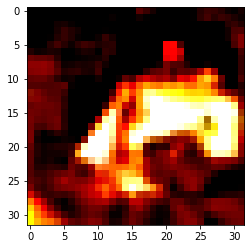

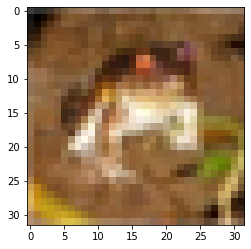

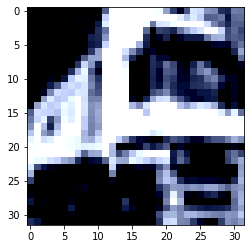

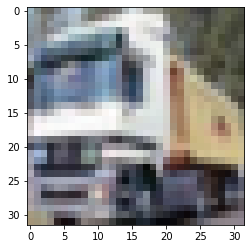

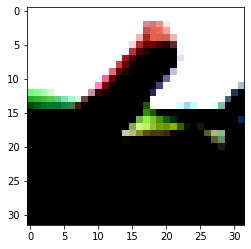

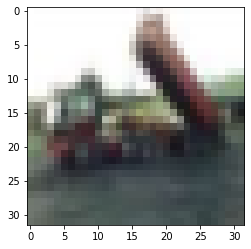

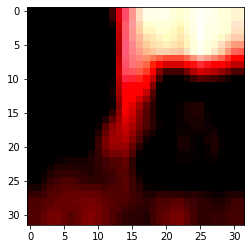

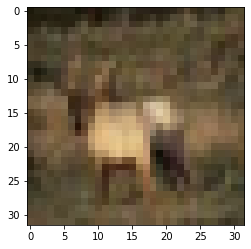

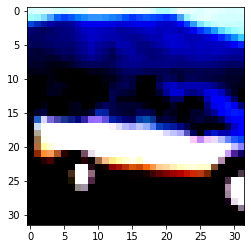

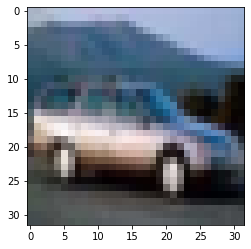

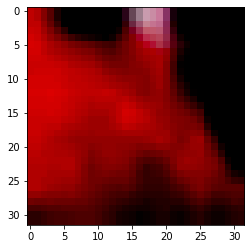

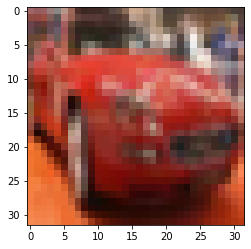

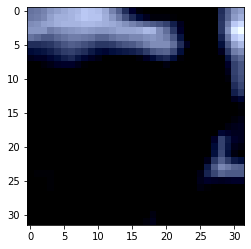

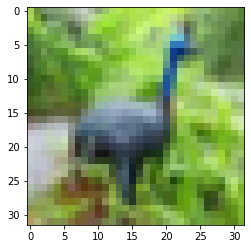

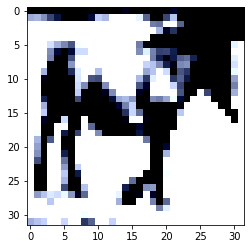

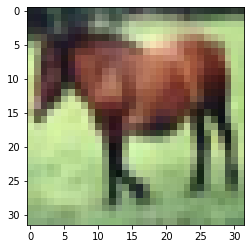

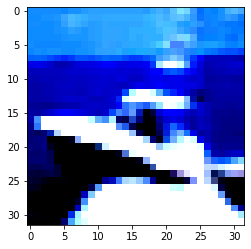

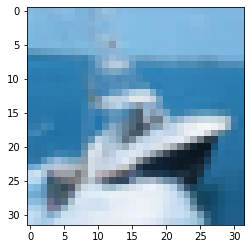

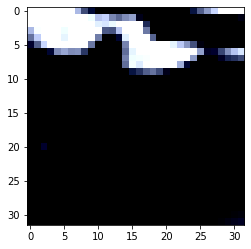

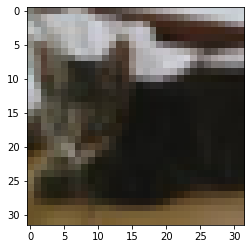

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import torch
for i in range(10):
    for img in trainset[i][0]:
        print(img.shape)
        plt.imshow(img.permute(1, 2, 0))
        plt.figure()
        # plt.imshow(torch.reshape(img_2, (32,32,3)))
        # print(label)


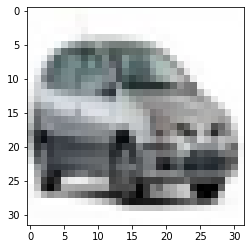

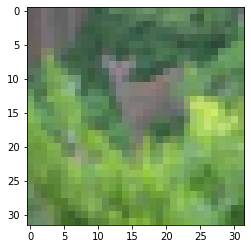

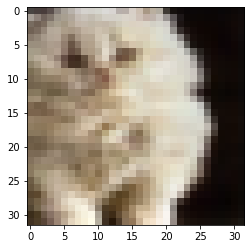

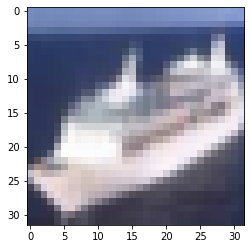

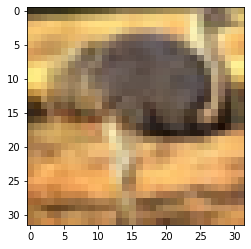

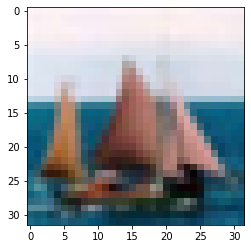

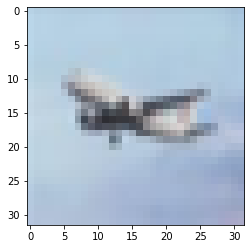

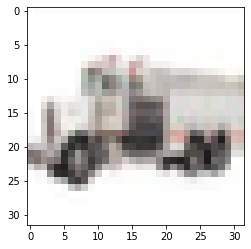

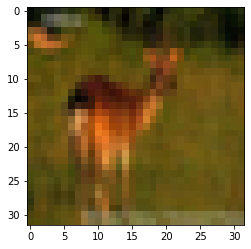

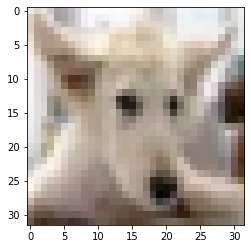

In [ ]:
importlib.reload(aug)
ds, _ = get_cifar10(batch_size=10, split='train', include_labels=False)
ds_small = ds.take(1)

for batch in ds_small:
    for img in batch:
        plt.imshow(img.numpy())
        plt.show()


get_cifar()